# Random Forest for Regression 

In [ ]:
# API Doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

### Compare Visually with Decision Tree

We see that the random forest regressor allows us to set a high tree depth (because it is averaging across a forest of trees)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('LinRegData.csv') # Read in our data, X and Y are series
x=data['X'].values.reshape(-1,1) # scikitlearn wants arguments as numpy arrays of this shape
y=data['Y'].values.reshape(-1,1)

In [17]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(max_depth=4)
from sklearn.ensemble import RandomForestRegressor
RFRegressor = RandomForestRegressor(max_depth=4, n_estimators=100)

In [18]:
treeRegressor.fit(x, y)
RFRegressor.fit(x, y)

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
x1 = np.linspace(0, 4, 50).reshape(-1, 1) # Make the predictions over the entire of X to see the tree splits
y_pred_tree = treeRegressor.predict(x1)
y_pred_forest = RFRegressor.predict(x1)

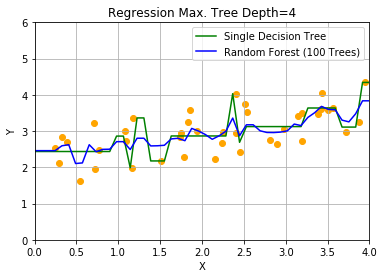

In [20]:
plt.scatter(x, y, color='orange') # scatter plot, learning data
plt.plot(x1, y_pred_tree, 'green') # plot of regression prediction on top (green line)
plt.plot(x1, y_pred_forest, 'blue') # plot of regression prediction on top (blue line)

plt.xlabel('X') # formatting
plt.ylabel('Y')
plt.grid()
plt.ylim([0,6]);
plt.xlim([0,4]);
plt.legend(['Single Decision Tree', 'Random Forest (100 Trees)'])
plt.title('Regression Max. Tree Depth=4');

### Compare Visually with ExtraTrees

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


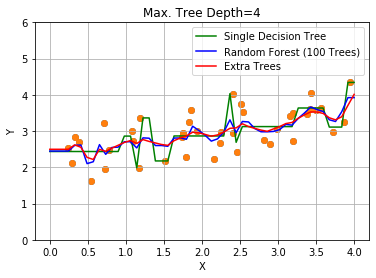

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # scikitlearn uses numpy arrays

# Get data
data = pd.read_csv('LinRegData.csv') # Read in our data
data.head() # See the first few rows to understand the data

# Data is X and Y coordinates
X = data['X']
Y = data['Y']
plt.scatter(X, Y) # Plot 
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

# Use scikitlearn to do regression
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(max_depth=4)

from sklearn.ensemble import RandomForestRegressor
RFRegressor = RandomForestRegressor(max_depth=4, n_estimators=100)

from sklearn.ensemble import ExtraTreesRegressor
ETRegressor = ExtraTreesRegressor(max_depth=4, n_estimators=100)

x=X.values.reshape(-1,1) # object wants arguments as numpy objects
y=Y.values.reshape(-1,1)
treeRegressor.fit(x, y)
RFRegressor.fit(x, y)
ETRegressor.fit(x, y)

x1 = np.linspace(0, 4, 50).reshape(-1, 1) # Make the predictions over the entire of X to see the tree splits

y_pred_tree = treeRegressor.predict(x1)
y_pred_forest = RFRegressor.predict(x1)
y_pred_extree = ETRegressor.predict(x1)

plt.scatter(X, Y) # scatter plot, learning data
plt.plot(x1, y_pred_tree, 'green') # plot of regression prediction on top (red line)
plt.plot(x1, y_pred_forest, 'blue') # plot of regression prediction on top (red line)
plt.plot(x1, y_pred_extree, 'red') # plot of regression prediction on top (red line)

#Plot formatting.
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.ylim([0,6]);
plt.legend(['Single Decision Tree', 'Random Forest (100 Trees)', 'Extra Trees'])
plt.title('Max. Tree Depth=4')
plt.grid()

### Compare with real data

In [5]:
data = pd.read_csv('stock_data_performance_fundamentals_300.csv', index_col=0) # Read in our data

In [6]:
X=data.drop(columns='Perf')
Y=data['Perf']
X.keys()

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Cash Ratio', 'Asset Turnover',
       'Gross Profit Margin'],
      dtype='object')

### First Tree Regression

In [23]:
# Use scikitlearn to do tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

treeRegressor = DecisionTreeRegressor(max_depth=1)

treeRegressor.fit(X_train, y_train)
y_pred = treeRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, treeRegressor.predict(X_test)))


train error 0.22197872895373053
test error 0.27922236775439335


### Next random forest regression

In [24]:
# Use scikitlearn to do tree regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

RFRegressor = RandomForestRegressor()

RFRegressor.fit(X_train, y_train)
y_pred = RFRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, RFRegressor.predict(X_test)))


train error 0.050856120936737026
test error 0.2868582455415218


### Plot learning curves for the two

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(max_depth=3)
RFRegressor = RandomForestRegressor()


In [16]:
# Learning curve for any Regressor
def learningCurve(myModel, X, Y, randomState):
    testErr, trainErr, trainSize = [],[],[] # We will take these lists as output
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=randomState)
    trainSize = range(1, len(X))
    for i in trainSize:
        myModel.fit(X_train[:i], y_train[:i])
        y_pred = myModel.predict(X_train[:i])
        trainErr.append(mean_squared_error(y_train[:i], y_pred))
        testErr.append(mean_squared_error(y_test, myModel.predict(X_test)))
    return np.sqrt(testErr), np.sqrt(trainErr), trainSize
    

In [17]:
# Plotting the learning curve shows some interesting things.
randomState=2 # randomstate try 123 and 1234
testErr1, trainErr1, trainSize1 = learningCurve(treeRegressor, X, Y, randomState) 
testErr2, trainErr2, trainSize2 = learningCurve(RFRegressor, X, Y, randomState) 

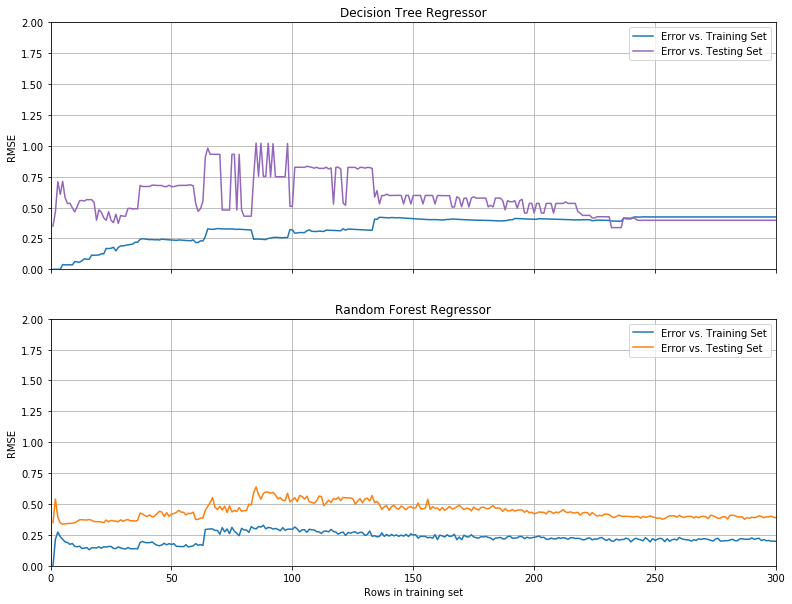

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(13,10))
axs[0].plot(trainSize1, trainErr1, trainSize1, testErr1, 'tab:purple')
axs[0].set_title("Decision Tree Regressor")
axs[1].plot(trainSize2, trainErr2, trainSize2, testErr2, 'tab:orange')
axs[1].set_title("Random Forest Regressor")

for ax in axs.flat:
    ax.set(xlabel='Rows in training set', ylabel='RMSE', ylim=(0,2), xlim = (0,300))
    ax.grid()
    ax.legend(['Error vs. Training Set', 'Error vs. Testing Set'])
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# Worth using Shufflesplit in the SKLearn learning_curve function to see the variability of the result.